### For each session, construct a perfectly increasing dummy neuron. How correlated is that to max value?

Conclusion: 
- Correlation to max value can't be explained by a simple drifting unit

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import utils.spike_utils as spike_utils
from constants.glm_constants import *
from constants.behavioral_constants import *
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
from scipy import stats
import warnings
from scipy.ndimage import gaussian_filter1d

warnings.filterwarnings('ignore')



In [5]:
OUTPUT_DIR = "/data/patrick_res/glm_2"
SESSIONS_PATH = "/data/patrick_res/sessions/valid_sessions_rpe.pickle"
sessions = pd.read_pickle(SESSIONS_PATH)

In [12]:
num_bins = 10
def assess_correlation(row):
    session = row.session_name

    behavior_path = SESS_BEHAVIOR_PATH.format(sess_name=session)
    beh = pd.read_csv(behavior_path)
    # filter trials 
    valid_beh = behavioral_utils.get_valid_trials(beh)
    feature_selections = behavioral_utils.get_selection_features(valid_beh)
    valid_beh = pd.merge(valid_beh, feature_selections, on="TrialNumber", how="inner")
    beh = behavioral_utils.get_feature_values_per_session(session, valid_beh)
    beh = behavioral_utils.get_relative_block_position(beh, num_bins)
    beh = behavioral_utils.get_max_feature_value(beh, num_bins)

    beh["DummyFiringRate"] = range(len(beh))

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    ax = axs[0]
    visualization_utils.plot_mean_sterrs_by_bin(beh, "DummyFiringRate", "MaxValueBin", ax, "Dummy Unit", num_bins)
    # visualization_utils.plot_mean_sterrs_by_block_pos(beh, "MaxValue", ax, row.PseudoUnitID, num_block_bins)
    ax.set_xlabel("Max Value Bin")
    ax.set_ylabel("Mean firing in inter-trial")
    ax.set_title(f"Session {session}")

    ax = axs[1]
    slope, intercept, r_value, p_value, std_err = stats.linregress(beh["MaxValue"], beh["DummyFiringRate"])
    ax.scatter(beh["MaxValue"], beh["DummyFiringRate"], alpha=0.3, color="black")
    ax.plot(beh["MaxValue"], beh["MaxValue"] * slope + intercept)
    ax.set_title(f"Cor w Max Value: r: {r_value:.3f}, p: {p_value:.3E}")
    ax.set_xlabel("Max Value Bin")
    ax.set_ylabel("Mean firing in inter-trial")

0      None
5      None
7      None
8      None
10     None
11     None
15     None
17     None
22     None
27     None
39     None
43     None
44     None
55     None
64     None
68     None
71     None
73     None
74     None
78     None
79     None
87     None
93     None
97     None
104    None
107    None
113    None
dtype: object

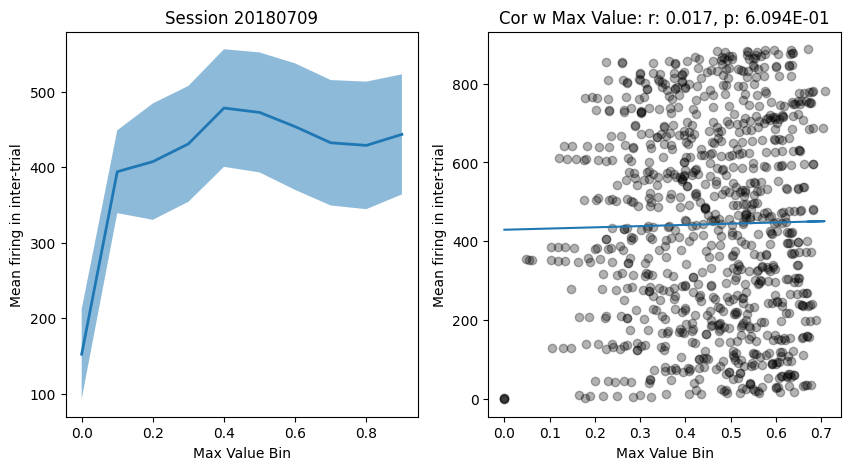

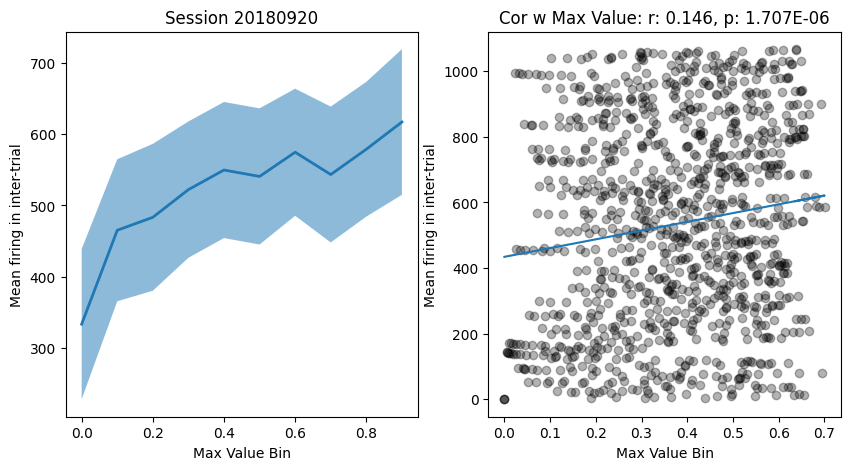

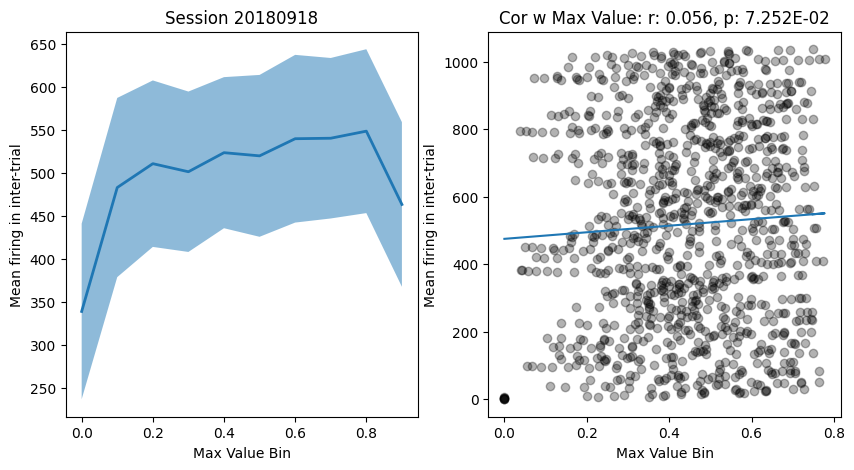

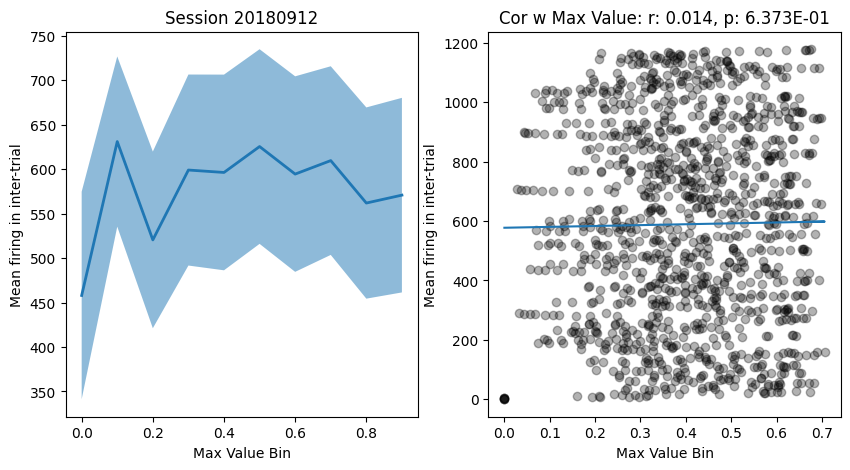

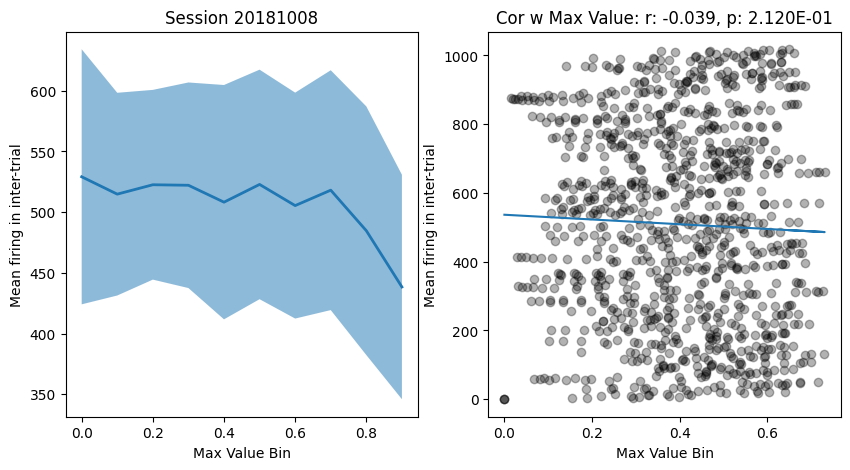

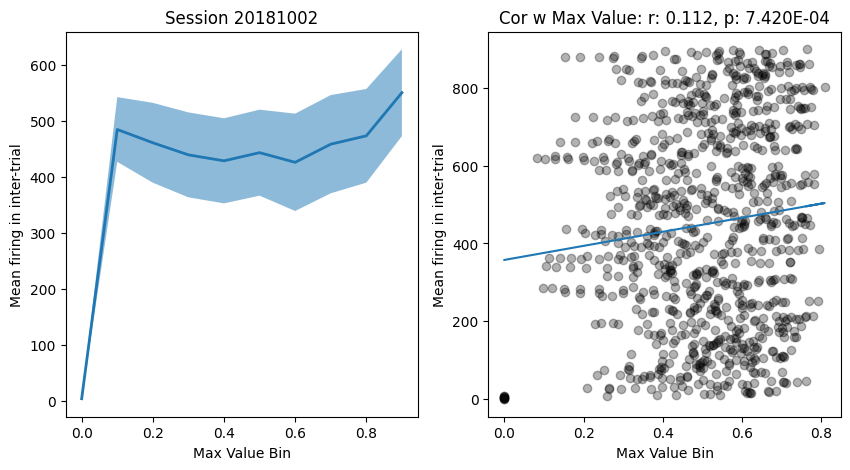

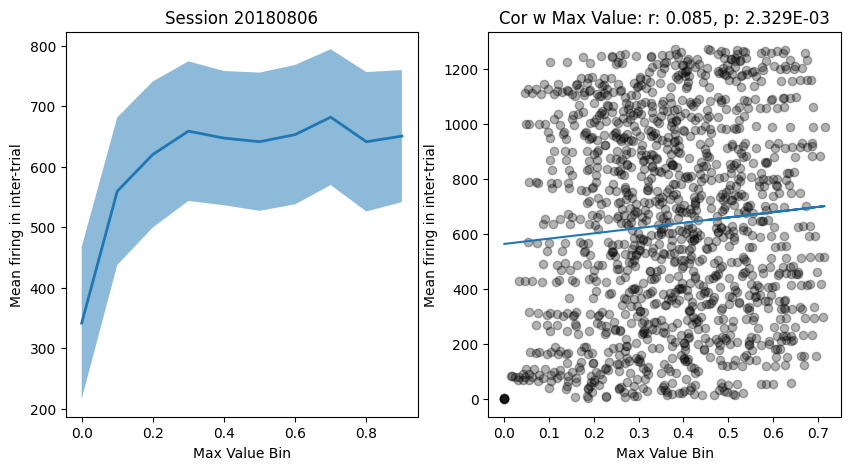

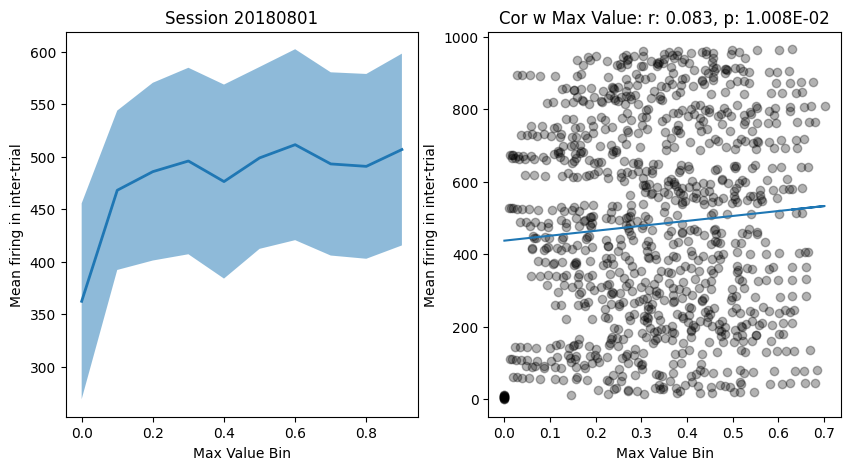

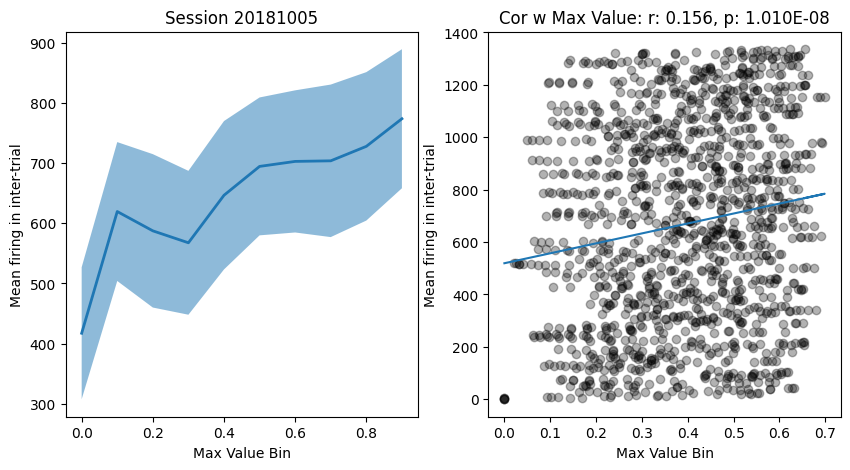

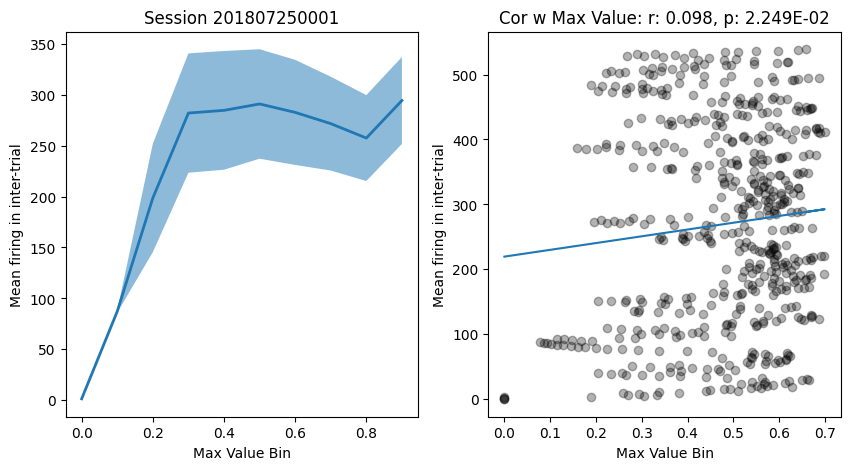

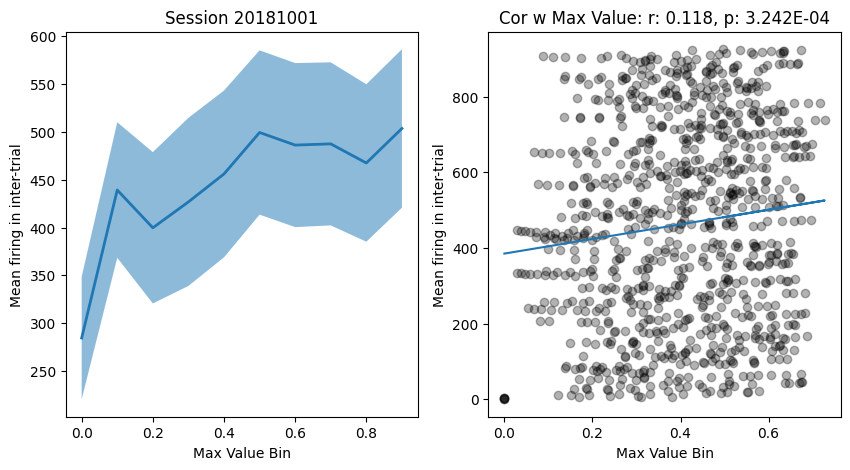

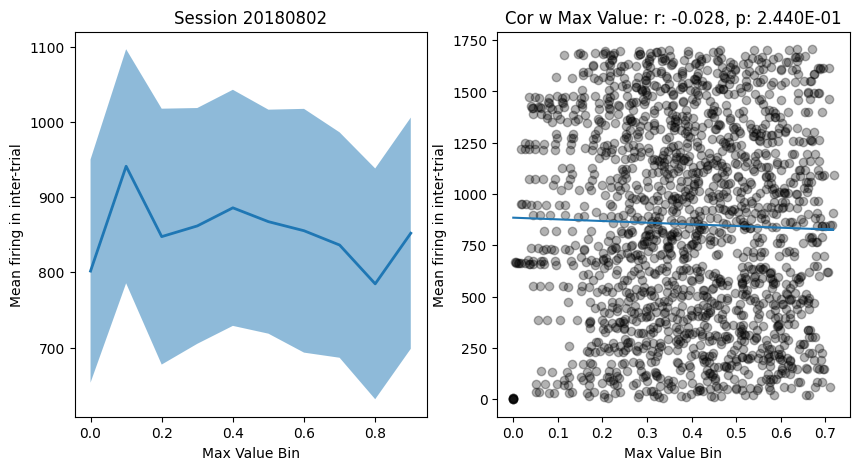

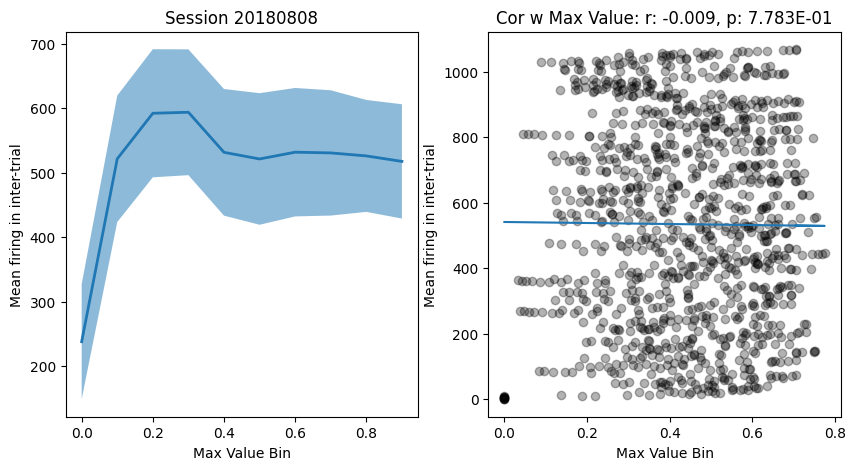

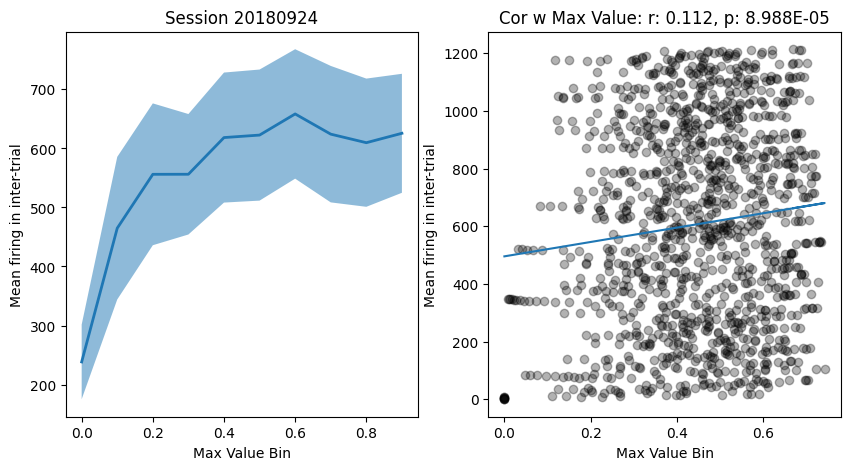

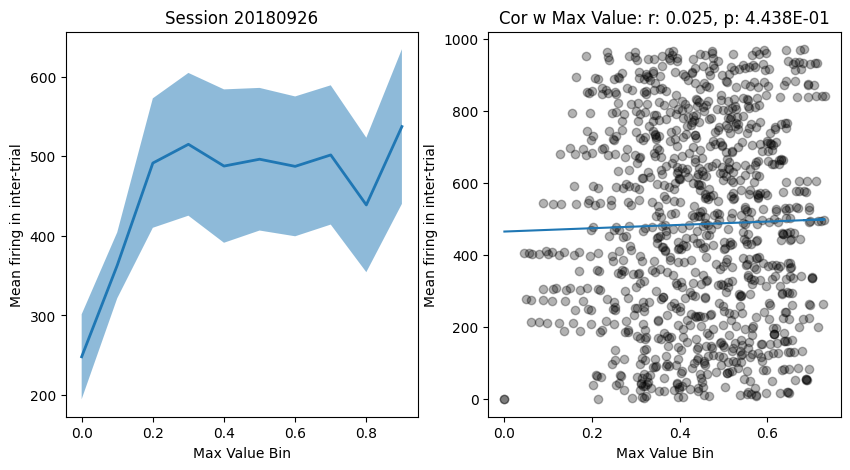

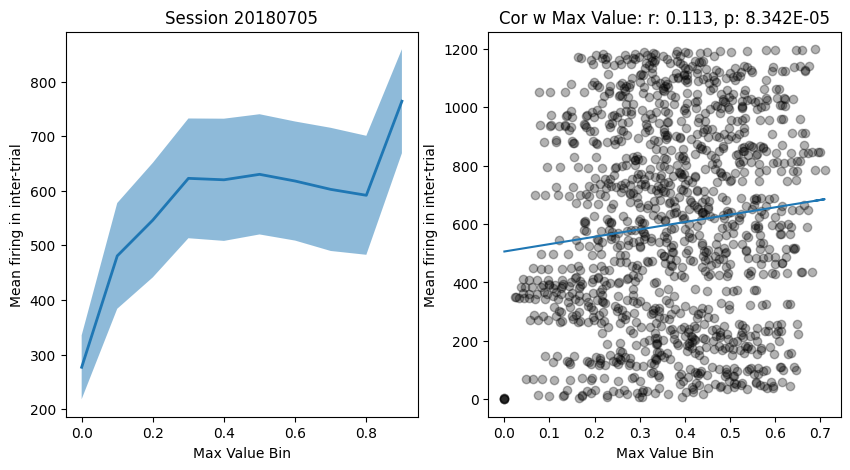

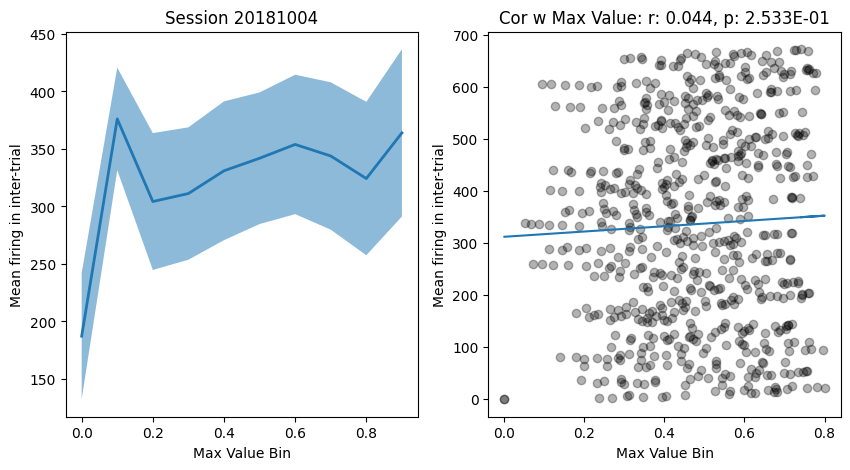

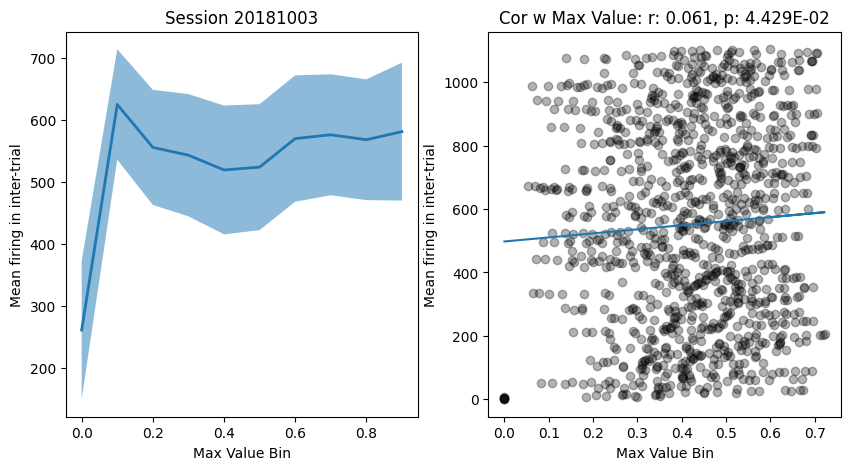

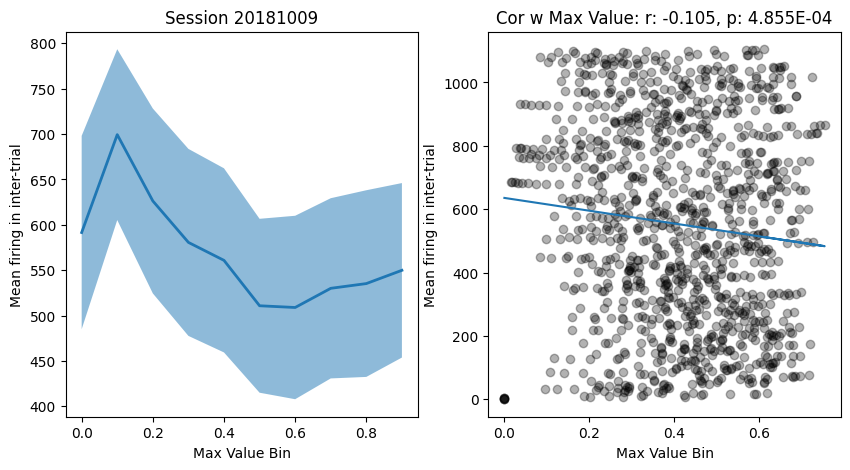

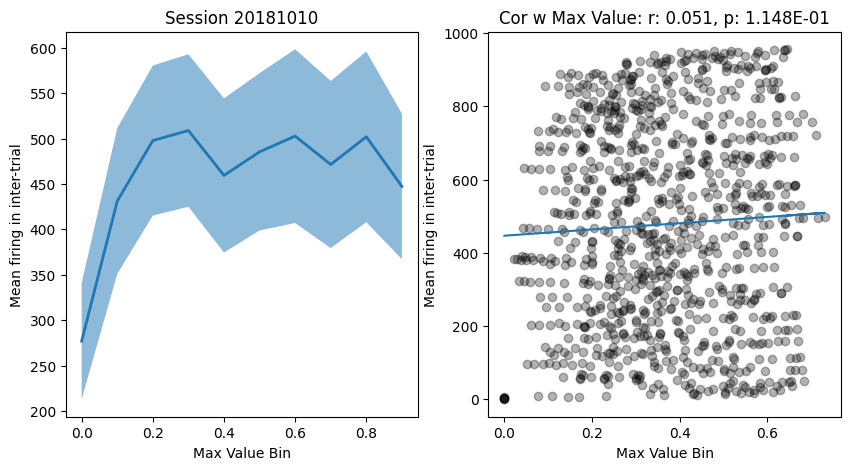

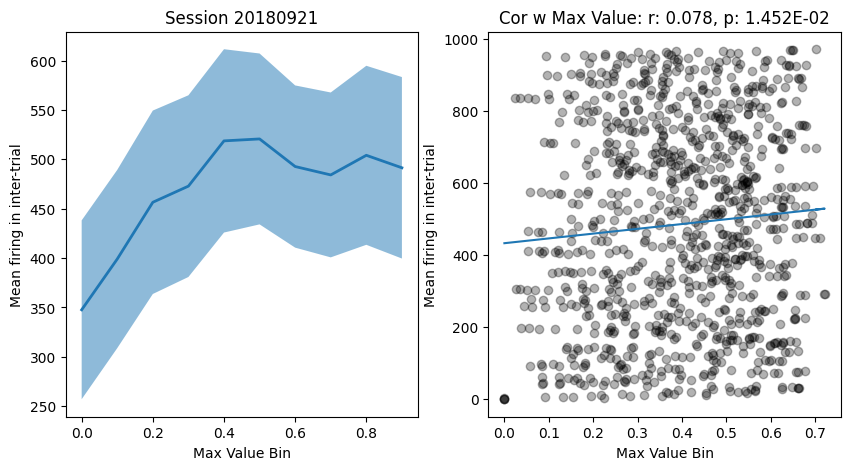

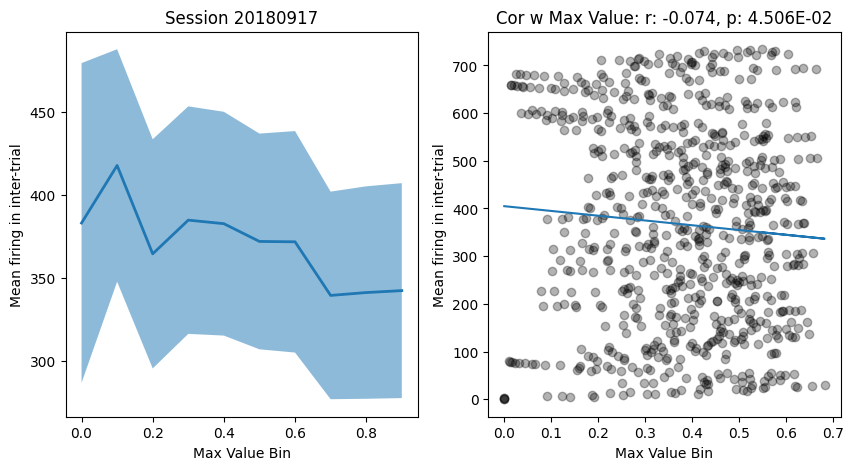

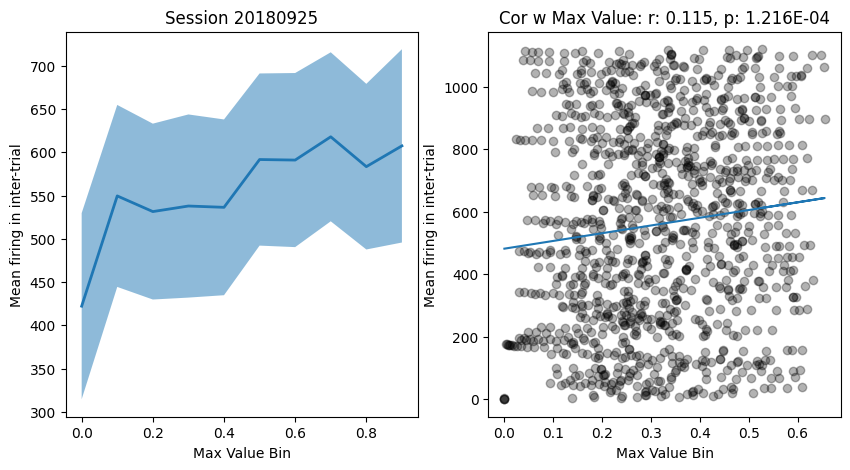

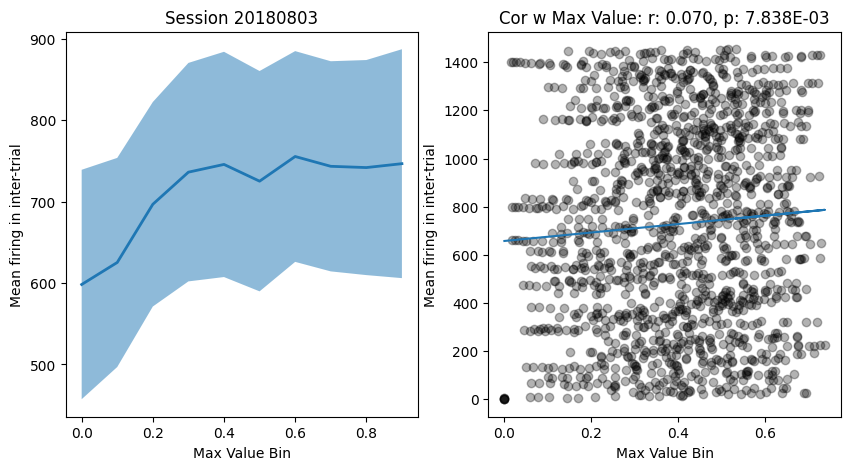

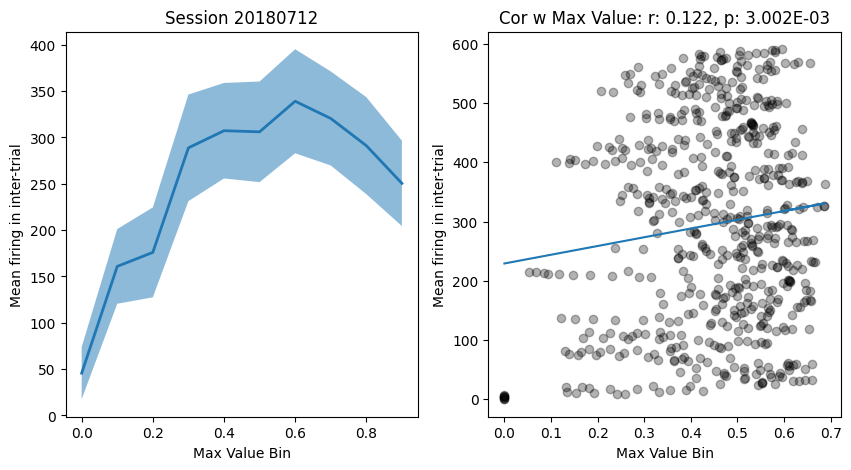

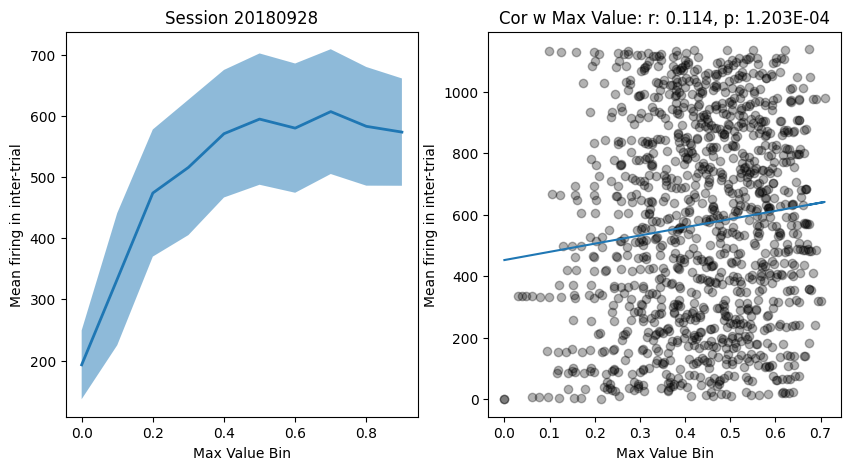

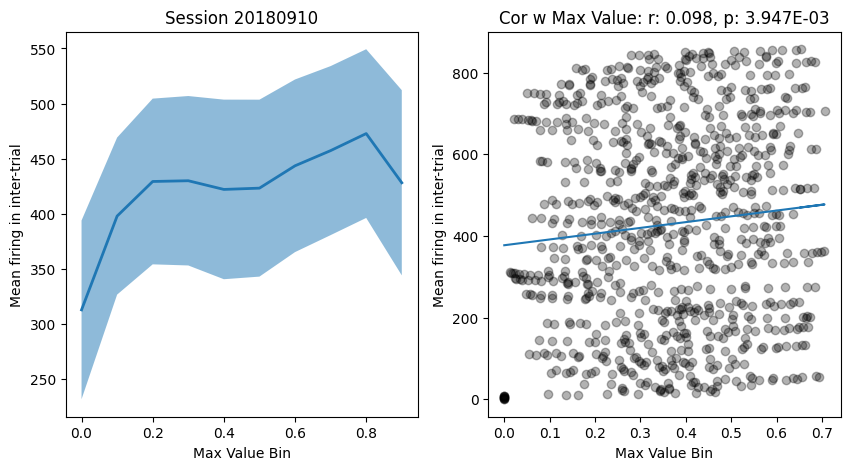

In [13]:
sessions.apply(assess_correlation, axis=1)